Студент: Вичев Александр

Проект по созданию линейной модели для зарплаты работников:

1. Импорт данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. Получение данных

In [2]:
salary = pd.read_csv('Salary_Data.csv')
salary = salary.dropna()

Просматриваем первые строки и информацию о данных:

In [3]:
print(salary.head())
print(salary.info())
print(salary.describe())

   Age  Gender Education Level          Job Title  Years of Experience  \
0   32    Male      Bachelor's  Software Engineer                  5.0   
1   28  Female        Master's       Data Analyst                  3.0   
2   45    Male             PhD     Senior Manager                 15.0   
3   36  Female      Bachelor's    Sales Associate                  7.0   
4   52    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6701
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   int64  
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary         

3. Исследовательский анализ данных

Шаг 4: Опыт работы (Years of Experience) и зарплаты (Salary)

На графике ниже представлено отношение опыта работы и заработка. И мы видим чёткую зависимость от опыта работника и уровня его дохода.

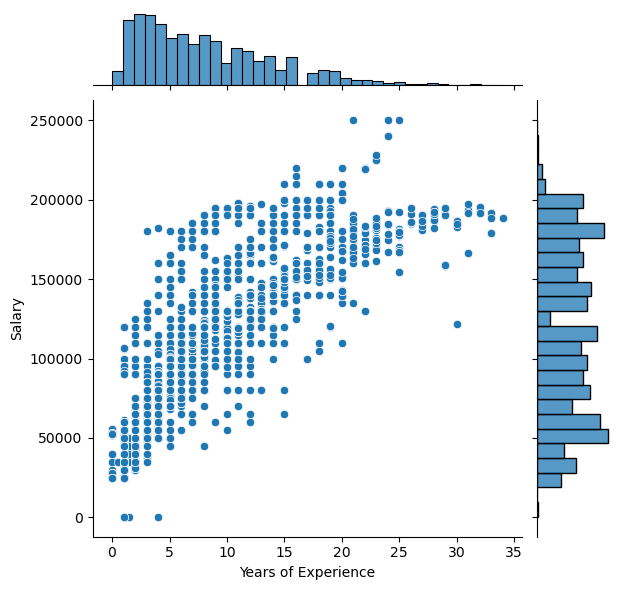

In [4]:
sns.jointplot(x='Years of Experience', y='Salary', data=salary)
plt.show()

Шаг 5: Сравнение возраста (Age) и зарплаты (Salary)

На графике ниже представлено отношение возраста и заработка. И мы видим что возраст работника практически не влияет на уровень его заработка.

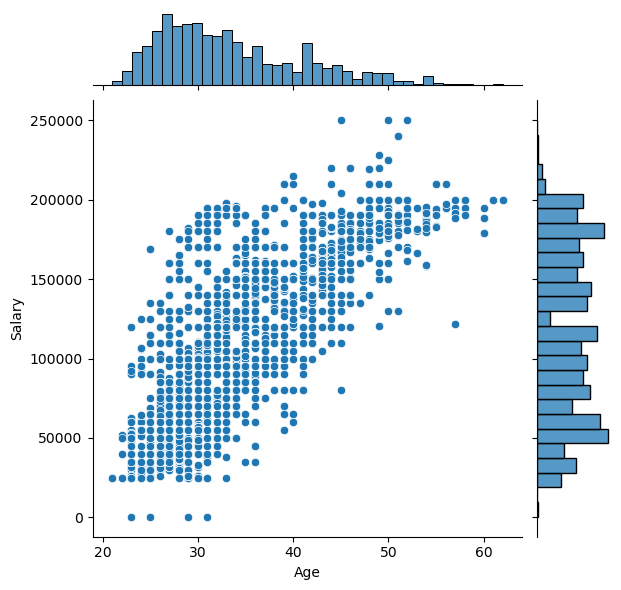

In [5]:
sns.jointplot(x='Age', y='Salary', data=salary)
plt.show()

Шаг 6: Сравнение опыта работа (Years of Experience) и опыта (Experience) в 2D

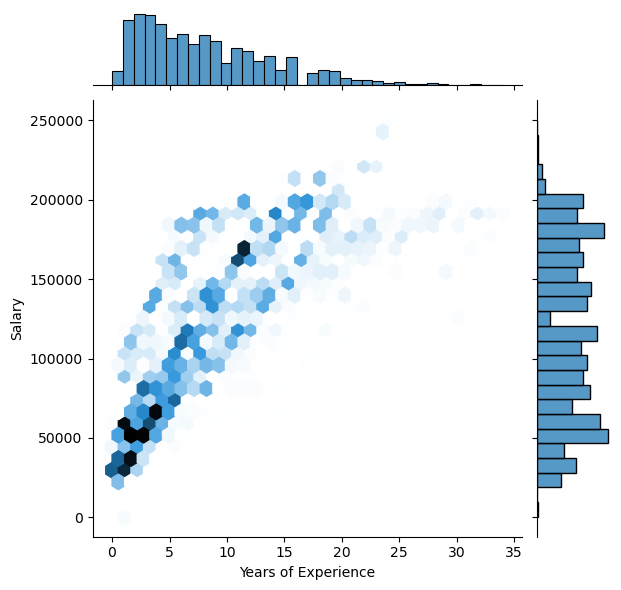

In [6]:
sns.jointplot(x='Years of Experience', y='Salary', kind='hex', data=salary)
plt.show()

Шаг 7: Исследование взаимосвязей

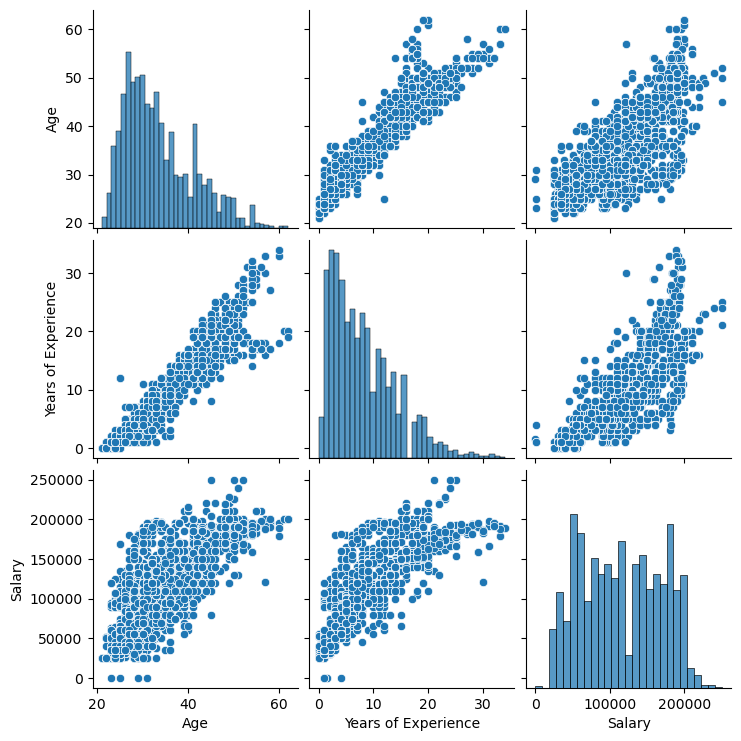

In [7]:
sns.pairplot(salary)
plt.show()

На основе графиков можно определить, какая характеристика наиболее коррелирует с Salary.

Шаг 8: Линейная регрессия для Experience и Salary

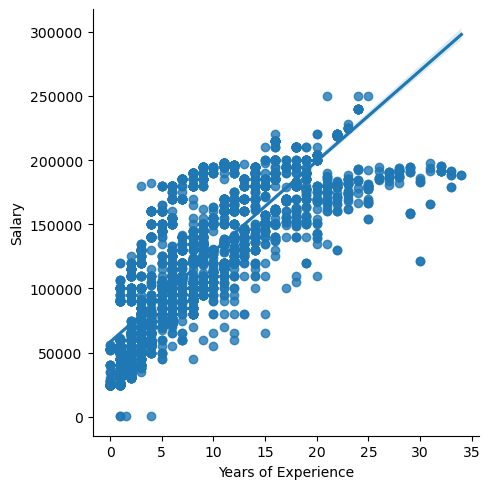

In [8]:
sns.lmplot(x='Years of Experience', y='Salary', data=salary)
plt.show()

4. Обучающие и тестовые данные

Шаг 9: Разделение набора данных

In [9]:
from sklearn.model_selection import train_test_split

X = salary[['Age', 'Years of Experience']]
y = salary['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

5. Обучение модели

Шаг 10-12: Обучение модели LinearRegression

In [10]:
from sklearn.linear_model import LinearRegression

X_train.dropna()
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Шаг 13: Коэффициенты модели

In [11]:
print(lm.coef_)

[-1699.08622544  9074.38954194]


6. Прогнозирование данных теста

Шаг 14: Прогнозирование тестовых значений

In [12]:
predictions = lm.predict(X_test)

Шаг 15: Создание диаграммы рассеяния реальных и предсказанных значений


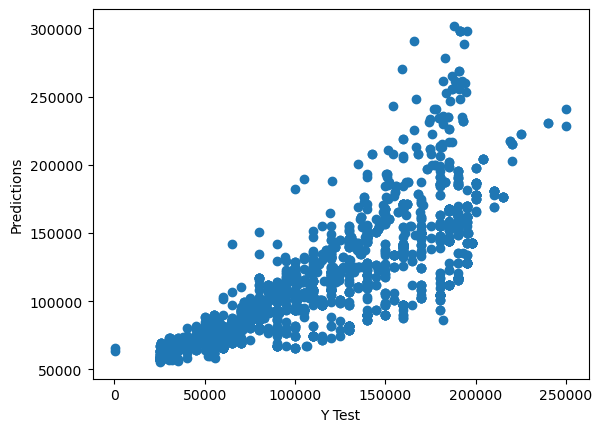

In [13]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')
plt.show()

7. Оценка модели

In [14]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)

MAE: 24823.715211010982
MSE: 964027899.1610831
RMSE: 31048.798675006463


8. Остатки
Шаг 17: Распределение остатков

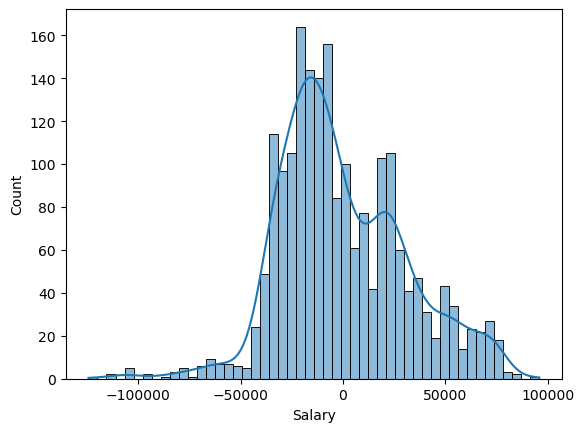

In [15]:
sns.histplot((y_test - predictions), bins=50, kde=True)
plt.show()

9. Заключение
Шаг 18-20: Интерпретация коэффициентов и выводы

In [16]:
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                     Coefficient
Age                 -1699.086225
Years of Experience  9074.389542


Интерпретация:
Experience скорее всего будет иметь значительный положительный коэффициент, что указывает на зависимость зарплаты от опыта.
Age может иметь меньший эффект, если опыт будет играть более важную роль.

Вывод:
Компания может сосредоточиться на увеличении зарплат для сотрудников с большим опытом, хотя возраст также может играть роль.